# Day 0 Practical: Churn for Bank Customers

Welcome to the first practical session of the SPAI Advanced Machine Learning Workshop. In this practical, you will experience the full workflow of building a simple classifier to predict whether does a customer decides to leave the bank*(also known as churning)* given the features of the customer.

## Data Dictionary
| Features | Descriptions |
| :--      | :---         |
| RowNumber| corresponds to the record (row) number and has no effect on the output.|
| CustomerId|contains random values and has no effect on customer leaving the bank.|
|Surname | the surname of a customer has no impact on their decision to leave the bank.|
|CreditScore|can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.|
|Geography|a customer’s location can affect their decision to leave the bank.|
|Gender|it’s interesting to explore whether gender plays a role in a customer leaving the bank.|
|Age|this is certainly relevant, since older customers are less likely to leave their bank than younger ones.|
|Tenure|refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.|
|Balance|also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.|
|NumOfProducts|refers to the number of products that a customer has purchased through the bank.|
|HasCrCard|denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.|
|IsActiveMember|active customers are less likely to leave the bank.|
|EstimatedSalary|as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. |
|Exited|whether or not the customer left the bank.|

# Exercise 1️⃣
# Import Libraries

Before we starting injesting the data, it is always a good practice to first import all libraries that you will be using for the project. In this notebook we will be using some common Machine Learning libraries as listed below:
- `pandas` : Widely used for data analysis and manipulation.
- `numpy` : Provides high-performance mathematical, algebraic and transformation for multi-dimensional array and matrix data structures.
- `matplotlib.pyplot` : Data visualisation and plotting libraries
- `seaborn` : Data visualisation and plotting libraries
- `sklearn` : Simple and efficient tools for predictive modeling
- `yellowbrick` : Visualization library for evaluating models



## Task

1. Import `pandas`, `numpy` and `matplotlib.pyplot`, `seaborn`, `sklearn` libraries with their commonly-used convention/accronym.

In [ ]:
'''
Hint:
1. Make use of "import ___ as ___" to import the libraries stated above with their accronym (pd, np, plt)
'''

### Write your code here ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
### End ###

# Exercise 2️⃣
# Data Ingestion

Let us begin the journey by first importing the data from the `.csv` file from the kaggle website. For the sake of this exercise, the dataset have been uploaded to the Github Repository and is accessible via the link below.


## Task

1. Read the `.csv` files provided in the link below and assign it in a variable called `bank_df`
2. Show the first five row of the `bank_df` dataset 

Churn for Bank Customers Link : 
```
https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/churn.csv
```


In [ ]:
'''
Hint:
1. Make use of pd.read_csv() method and parse the url as the parameter into the method and save the outcome in variable called bank_df.
2. Use .head() method to show the first five row of the dataset.
'''

### Write your code here ###
bank_df = pd.read_csv("https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/churn.csv")
bank_df.head()
### End ###

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis
In our attempt to better understand the dataset, we will be performing EDA by using `pandas` library for data manipulation and `matplotlib` & `seaborn` libraries for visualisation.

For the sake of the time in this workshop, we will be showing you the EDA process and code. If you are unclear about any of the methods used for EDA, do refer back to the Tutorial and Practical notebook from [SPAI Beginner Machine Learning Bootcamp 2021](https://github.com/Tien-Cheng/ML-Bootcamp-2021/tree/main/Beginner%20Machine%20Learning%20Bootcamp).

The following are a few questions that we attempt to investigate from our dataset:
1. What columns do we have and what are their datatypes?
2. How many records and features do we have in this dataset?
3. Is there any null values in the dataset?
4. What is the numerical summary for numerical features?
5. How is the data distribution for numerical features?
6. How is the data distribution for categorical features?


In [ ]:
bank_df.info() # Shows the name and datatypes of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
bank_df.shape # Show the number of records and number of features

(10000, 14)

In [ ]:
bank_df.isnull().sum() # Show the number of null values in each columns

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
bank_df.describe().T # Show the numerical summaries

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


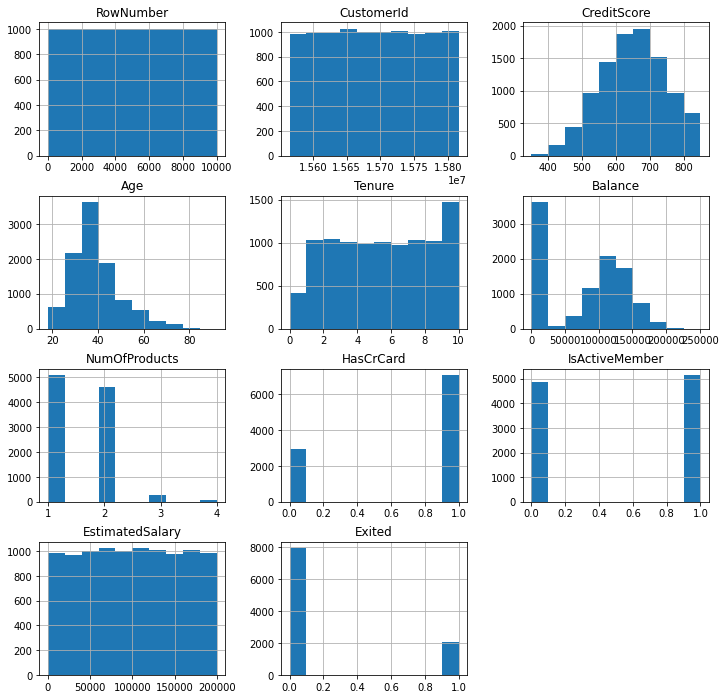

In [ ]:
# Histogram of numerical columns
bank_df.hist(figsize=(12, 12))
plt.show()

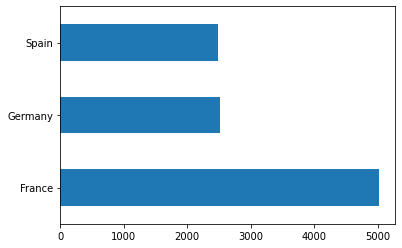

In [ ]:
# Count Plot on Geography
bank_df['Geography'].value_counts().plot(kind='barh')
plt.show()

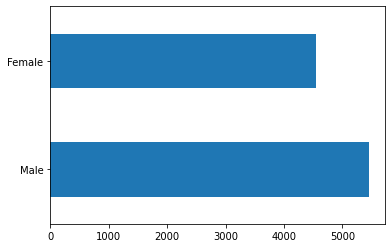

In [ ]:
# Count Plot on Gender
bank_df['Gender'].value_counts().plot(kind='barh')
plt.show()

# Data Preprocessing
Let us import the functions that we will be using for data preprocessing and data splitting from `sklearn` library.

In [ ]:
# Sklearn Functions
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
# Data Partition
from sklearn.model_selection import train_test_split
# Modelling 
from sklearn.neighbors import KNeighborsClassifier
# Model Evaluation
from sklearn.metrics import f1_score

## Exercise 3️⃣
## Dropping Unnecessary Columns
Before we start splitting our data, let us first discard some columns that are not helpful for our prediction task. Those features are dropped as knowing the customer *'RowNumber', 'CustomerId' & 'Surname'* would not be useful for us to determine whether does the customer decides to churn. 


### Task

1. Drop `['RowNumber', 'CustomerId', 'Surname']` from our original dataframe and assign it to variable `df_drop`.

In [ ]:
'''
Hint:
1. Make use of .drop() methods and use columns parameter to specify the columns to drop
'''

### Write your code here ###
df_drop = bank_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
### End ###

df_drop

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Dropping Missing Values
Since there are no null values and anomalies in the dataset, we will not drop any rows and do any imputation to the value. In practice, you should always treat the null values by either dropping or imputation since most machine learning model couldn't handle missing values by default.

## Exercise 4️⃣
## Data Splitting : Train Test Split

To allow us to better gauge the performance of the model, we will be performing train-test-split towards our `df_drop` so that we can fit our model with the train set and evaluate it using the test set.



### Task
1. Identify and extract features and target variable, and save it to variable `X` and `y` accordingly
2. Make use of `train_test_split` function to split a train and test set with `test_size = 0.3` and `random_state = 42`

In [ ]:
'''
Hint:
1. Make use of .drop( columns = <target_variable_name> ) to remove target variable and keep only features
2. Make use of column slicing with [ <target_variable_name> ] to extract target variable
'''

### Write your code here ###
X = df_drop.drop(columns = "Exited")
y = df_drop["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
### End ###
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,619,Spain,Female,32,4,175406.13,2,1,1,172792.43
2603,643,Germany,Female,34,7,160426.07,1,0,1,188533.11
7738,561,France,Male,33,6,0.00,2,0,0,173680.39
1579,618,Germany,Male,41,8,37702.79,1,1,1,195775.48
5058,714,France,Male,37,9,148466.93,2,0,1,151280.96
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


## Exercise 5️⃣
## Handling Numerical Features (Feature Scaling)

In this dataset, there are several continuous numerical features like *['CreditScore', 'Age', 'Balance', 'EstimatedSalary']* and discrete numerical features like *['Tenure', 'NumOfProducts']*

Since the discrete numerical features are encoded nicely without the need of further manipulation, the only preprocessing steps we could take is to perform **Feature Scaling** to the continuous numerical features. We will be using `StandardScaler` from `sklearn.preprocessing` to complete the task below.



### Task
1. Create variable with list of numerical features to perform standard scaling `['CreditScore', 'Age', 'Balance', 'EstimatedSalary']` and store it in variable `num_col`
2. Initialise `StandardScaler()` class imported from sklearn library and save the instance in variable `scaler`
3. Perform fit transform with the feature scaler to the numerical columns in `X_train` and replace the result to the numerical columns in `X_train_scaled`
4. Make use of the same feature scaler and transform the numerical columns in `X_test` and replace the result to the numerical columns in `X_test_scaled`

In [ ]:
'''
Hint:
1. Define a list named num_col with all the numerical columns mentioned above
2. Initiate the StandardScaler() object and store it in variable scaler
3. Use .fit_transform() from scaler to X_train[num_col] and stored the result in X_train_scaled[num_col]
4. Use .trasform() from scaler to X_test[num_col] and stored the result in X_test_scaled[num_col]
'''

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

### Write your code here ###
num_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
X_train_scaled[num_col] = scaler.fit_transform(X_train[num_col])
X_test_scaled[num_col] = scaler.transform(X_test[num_col])
### End ###

X_train_scaled[num_col]

,CreditScore,Age,Balance,EstimatedSalary
9069,-0.344595,-0.656750,1.583725,1.248214
2603,-0.095181,-0.466380,1.344106,1.521225
7738,-0.947345,-0.561565,-1.222055,1.263615
1579,-0.354987,0.199916,-0.618965,1.646839
5058,0.642668,-0.180824,1.152808,0.875112
...,...,...,...,...
5734,1.203850,1.437322,-0.106936,-0.545387
5191,0.310116,1.818063,-1.222055,-1.736501
5390,0.860905,-0.085639,-1.222055,-0.149259
860,0.154233,0.390286,1.820806,-0.057544


## Exercise 6️⃣
## Handling Categorical Features (Nominal Encoding)

For nominal data, we need to convert value into 1 or 0 values to the column. This is to allow our model to better understand the categorical variable since it could not interpret a string value without any feature encoding. In this practical, we will be using `pd.get_dummies` to perform the nominal encoding but in subsequent days, you will be exposed to using `OneHotEncoder` from `sklearn.preprocessing` in a Pipeline.



### Task

1. List out all Normial Categorical Column `['Geography','Gender']` and store it in variable `cat_col`
2. Create dummy variable for `X_train_scaled` with `.get_dummies()` method by parsing parameter `(X_train_scaled, columns=cat_col, drop_first=True)` and assign it to `X_train_onehot`
3. Create dummy variable for `X_test_scaled` with `.get_dummies()` method by parsing parameter `(X_test_scaled, columns=cat_col, drop_first=True)` and assign it to `X_test_onehot`

In [ ]:
'''
Hint:
1. Define a list named cat_col with all the nominal categorical columns mentioned above
2. Use pd.get_dummies() with parameters mentioned above and store the outcome in X_train_onehot
3. Use pd.get_dummeis() with parameters mentioned above and store the outcome in X_test_onehot
'''

### Write your code here ###
cat_col = ['Geography','Gender']

X_train_onehot = pd.get_dummies(X_train_scaled, columns=cat_col, drop_first=True)
X_test_onehot = pd.get_dummies(X_test_scaled, columns=cat_col, drop_first=True)
### End ###
X_train_onehot

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9069,-0.344595,-0.656750,4,1.583725,2,1,1,1.248214,0,1,0
2603,-0.095181,-0.466380,7,1.344106,1,0,1,1.521225,1,0,0
7738,-0.947345,-0.561565,6,-1.222055,2,0,0,1.263615,0,0,1
1579,-0.354987,0.199916,8,-0.618965,1,1,1,1.646839,1,0,1
5058,0.642668,-0.180824,9,1.152808,2,0,1,0.875112,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,1.203850,1.437322,8,-0.106936,1,1,1,-0.545387,0,0,1
5191,0.310116,1.818063,1,-1.222055,1,1,1,-1.736501,0,0,0
5390,0.860905,-0.085639,1,-1.222055,3,0,0,-0.149259,0,0,0
860,0.154233,0.390286,8,1.820806,1,1,0,-0.057544,0,0,1


# Exercise 7️⃣
# Model Building and Evaluation

Our data is now ready to be parse into our machine learning model. Let us continue to build a simple K-Nearest Neighbour model and predict whether does a customer decides to leave the bank.

5 Steps of Model Fitting and Prediction with Scikit-Learn Library:

- Import model class from Sklearn library
- Initiate the class with hyperparameters and store the instance at a variable
- Call .fit() method to train the model by parsing X_train and y_train
- Call .predict() method with the trained model to predict features, X_test
- Evaluate the performance of model by comparing the prediction with ground truth, y_test




## Task
1. Initiate the `KNeighborsClassifier` class with `n_neighbors=5` as hyperparameter and save it as variable `knn`
1. Fit the model with `X_train_onehot` and `y_train`
1. Predict the label of `X_test_onehot` and save it as variable `prediction`
1. Compare `prediction` and `y_test` with `f1_score` function from `sklearn.metrics` and save the result at variable `f1`.

In [ ]:
### Write your code here ###
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_onehot, y_train)
prediction = knn.predict(X_test_onehot)
f1 = f1_score(y_test, prediction)
### End ###

print(f"F1 Score for {KNeighborsClassifier.__name__} : {f1}") # Print out the score

F1 Score for KNeighborsClassifier : 0.4280936454849498


# Conclusion
Congratulations! You have completed Practical Notebook for Day 0 of SPAI Advanced Machine Learning Workshop. If you have any doubts or require any clarification, feel free to approach us us through our [Instagram](https://www.instagram.com/spai.sp/) or [Discord Server](https://discord.gg/zPYJMGfQFa)*(remember to verify yourself)* or revise the material from Beginner Machine Learning Bootcamp.

Meeting Recordings 
- OneDrive : https://ichatspedu.sharepoint.com/:f:/t/SPAI/Er059biGhKJGlPpqMNcWGxIBX7ynLf5fi6jCEO3suhijYg?e=XG3E8U

Lesson Material:
- Google Drive : https://drive.google.com/drive/u/1/folders/1jfDncbT7Vl7X8U-SYs0djJ3i449uWLGz

- GitHub Repository : https://github.com/SPAI-Team/ML-Bootcamp-2021/tree/main/Beginner%20Machine%20Learning%20Bootcamp
---
> ### Feel Free to Join the Subsequent **SPAI Machine Learning Competition** to earn **valuable Prize💰 and Experience🏆** if you have not done so!🥳🥳
[ML Comp Sign Up Link](https://docs.google.com/forms/d/e/1FAIpQLSchLDXDAY0LqM6fuRDyQwdRNbVT4FYrgDtqthEIfYpFvpWMAg/viewform) *(If it has not been closed)*